In [1]:
import tensorflow as tf
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.engine.keras_tensor import KerasTensor
from tensorflow.python.keras.engine.functional import Functional
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.regularizers import l1, l2
import os

from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning, prune_low_magnitude

from callbacks import all_callbacks


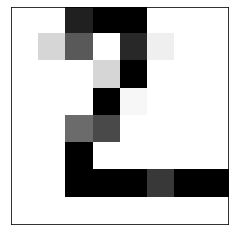

In [50]:
import MNIST_dataset as mnist

#Choose the final size of your image dataset
size_final = 8

data_zoom = mnist.MNISTData(size_initial=20, size_final=size_final, color_depth=5, flat=True)
test= data_zoom.x_test
ax = plt.subplot(1, 1 , 1)

plt.imshow(test[1].reshape(size_final,size_final), cmap='gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [66]:
#lista contenente gli indici delle immagini campione nel Test Set del MNIST
#num_list[0] contiene l'indice dell'immagine di uno zero, num_list[1] di un uno e così via
#           0  1  2  3  4  5  6  7  8  9          
num_list = [3, 2, 1, 32,4, 15,21,0, 61,12]


#---------------------------------------------------------
#--FORMAT OF INPUT IMAGES FOR NN IN FPGA------------------
#----------- ap_fixed<6,0> -------------------------------
#---------------------------------------------------------

# last pixel              first pixel
#[0  1  0  0  0  0 | ... | 0  0  0  1  0  0]
# s  4  3  2  1  0         s  4  3  2  1  0 
#    2  2  2  2  2            2  2  2  2  2  


with open('TESTimg_downto_apfixed6.txt', 'w') as f:
    for index , num in enumerate(num_list):
        f.write(str(index)+ ': ')
        for i in np.flip(test[num]):
            f.write('{:06d}'.format(int((bin(int(i*256/4))[2:]))))
            #print(bin(int(i*256))[2:]).count()
        f.write('\n\n')


In [67]:
print(test[3]*100)
print(test[0]*256/4)

[ 0.     0.     0.     9.375 84.375  0.     0.     0.     0.     0.
  9.375 96.875 96.875 15.625  0.     0.     0.     0.    96.875 96.875
 68.75  87.5    0.     0.     0.     0.    96.875  0.     0.    12.5
 96.875  0.     0.    31.25  53.125  0.     0.    12.5   96.875  0.
  0.    59.375 56.25   0.    28.125 96.875 59.375  0.     0.    15.625
 96.875 93.75  93.75  87.5    0.     0.     0.     0.     6.25  96.875
 28.125  0.     0.     0.   ]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 28. 16.  0.  0.  0.  0.  0.  0. 12.
 14. 44. 46. 34. 58.  0.  0.  0.  0.  0.  0. 38.  8.  0.  0.  0.  0.  0.
  0. 62.  0.  0.  0.  0.  0.  0. 46.  6.  0.  0.  0.  0.  0.  6. 50.  0.
  0.  0.  0.  0.  0. 62.  0.  0.  0.  0.]
